# <center><span style='color:red'>**Feature engineering** </span></center>

## Handling numerical data

### Handling outliers 
**Drawing box plots to identify ourliers in the numerical columns**

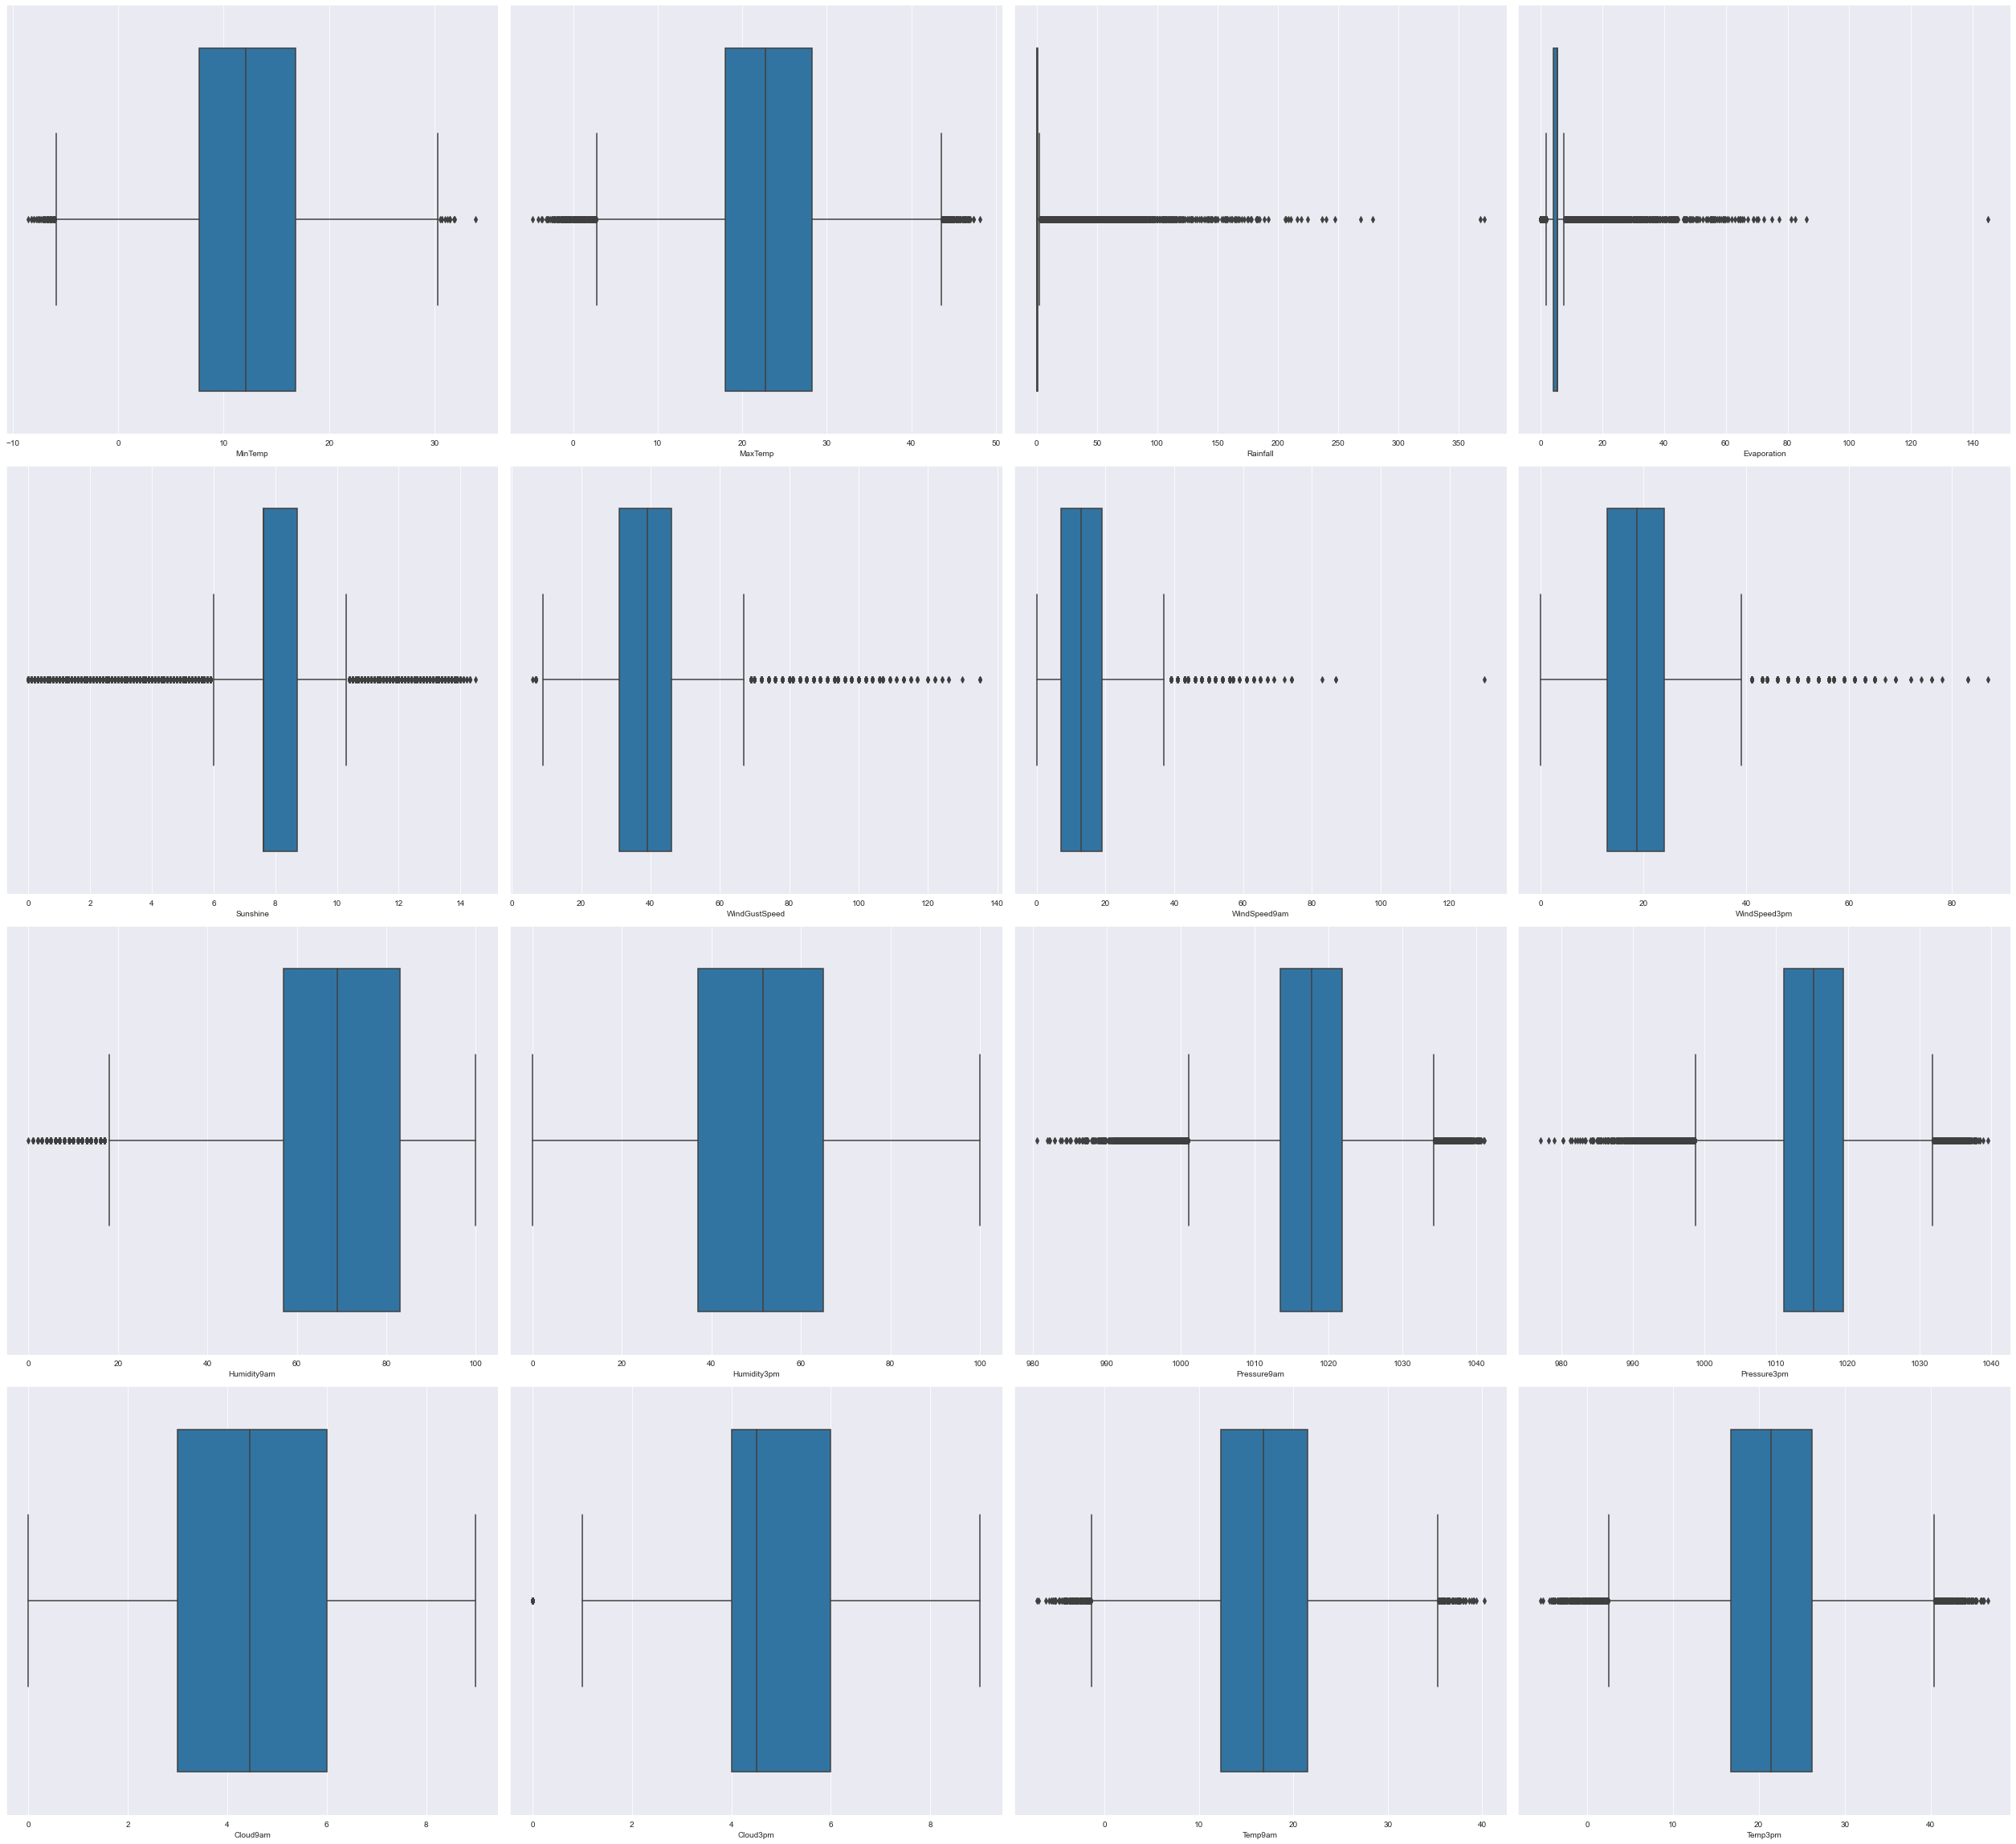

In [50]:
a=4
b=4
c=1
fig = plt.figure(figsize=(35,32))
for i in weather:
    if weather[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.boxplot(weather[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()    

From the box plots made above it can be seen that the following columns contain outliers:

  Rainfall
  
  Evaporation
  
  WindGustSpeed
  
  WindSpeed9am
  
  WindSpped3pm

In [51]:
#Removing outliers
for i in weather:
    if weather[i].dtype=='float64':
        q1 = weather[i].quantile(0.25)
        q3 = weather[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(weather[i])
        for j in weather[i]:
            if j > Upper_tail or j < Lower_tail:
                weather[i] = weather[i].replace(j, med)
    else:
        continue
#Since outliers affect the mean value as well thus here we are relacing the outliers with median values.

### Handling categorical data

#### Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
categorical_columns=['RainTomorrow', 'WindDir3pm', 'WindGustDir', 'WindDir9am', 'RainToday', 'Location']
for i in categorical_columns:
    weather[i]=label_encoder.fit_transform(weather[i])

In [53]:
weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Year
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,1,2008
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2,2008
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,3,2008
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,4,2008
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,5,2008


In [56]:
X=weather.drop('RainTomorrow',axis=1)
y=weather['RainTomorrow']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
X_train.head(2)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (101822, 23)
Shape of X_test: (43638, 23)


#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)

In [59]:
X_train.shape

(101822, 23)

In [60]:
lr.fit(X_train,y_train)
predict=lr.predict(X_test)

In [61]:
predict

array([1, 0, 0, ..., 1, 0, 1])

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90     37455
           1       0.46      0.71      0.56      6183

    accuracy                           0.84     43638
   macro avg       0.70      0.79      0.73     43638
weighted avg       0.88      0.84      0.85     43638



In [64]:
print(confusion_matrix(predict,y_test))

[[32202  5253]
 [ 1785  4398]]


In [65]:
lr.score(X_test,y_test)

0.838718548054448

In [66]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(predict,y_test)))

0.40159862044777


#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
prediction=dtree.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     33566
           1       0.51      0.49      0.50     10072

    accuracy                           0.78     43638
   macro avg       0.68      0.68      0.68     43638
weighted avg       0.77      0.78      0.77     43638



In [70]:
print(confusion_matrix(prediction,y_test))

[[28884  4682]
 [ 5103  4969]]


In [71]:
dtree.score(X_test,y_test)

0.7757688253357166

#### Random Forest classifiers

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [73]:
RandomForestRegressorScore = rf.score(X_test,y_test)

In [74]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     33566
           1       0.51      0.49      0.50     10072

    accuracy                           0.78     43638
   macro avg       0.68      0.68      0.68     43638
weighted avg       0.77      0.78      0.77     43638



In [75]:
print(confusion_matrix(prediction,y_test))

[[28884  4682]
 [ 5103  4969]]


In [76]:
rf.score(X_test,y_test)

0.8527430221366699

**XGBoost**

In [80]:
from xgboost import  XGBClassifier

In [81]:
xgb_model=XGBClassifier()

In [82]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
predictions_xgb=xgb_model.predict(X_test)

In [87]:
predictions_xgb

array([0, 0, 0, ..., 1, 0, 1])

In [90]:
xgb_model.score(X_test,y_test)

0.8552179293276502